In [35]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
provedores = pd.read_csv('contrataciones_por_proveedor.csv',sep=';')

In [3]:
provedores.head()

,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total
0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.0,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.0
1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.0,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.0
2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.0,Limpieza en areas regeneradas,4709260.50,4709260.5
3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.0
4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.0,NaN,4209650.90,4209650.9


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=1, max_df=0.8, use_idf=True, stop_words=['la', 'del', 'en', 'los', 'las' ,'el','no','lo','esto',"al","este","para","que","ver","eso","es"], strip_accents="unicode")

In [18]:
train_tfidf = tfidf.fit_transform(provedores["Objeto contractual"])

In [34]:
tfidf.get_feature_names()

['00',
 '000',
 '00001',
 '00004',
 '000126',
 '000raciones',
 '001',
 '001001000000354',
 '001001000001805',
 '001001000001895',
 '0012',
 '00126',
 '0018',
 '002',
 '003',
 '003001000001209',
 '004',
 '0045',
 '005',
 '006',
 '007',
 '008',
 '009',
 '01',
 '010',
 '0105325393001',
 '0108',
 '0109',
 '011',
 '012',
 '01395',
 '014',
 '015',
 '016',
 '017',
 '01729',
 '018',
 '019',
 '01d06',
 '01d08',
 '02',
 '020',
 '021',
 '022',
 '023',
 '025',
 '026',
 '027',
 '028',
 '0288',
 '029',
 '02d02',
 '02d03',
 '02d04',
 '02frasco',
 '02mg',
 '03',
 '030',
 '031',
 '0317',
 '0318',
 '032',
 '033',
 '035',
 '037',
 '039',
 '03d02',
 '03d03',
 '04',
 '044',
 '045',
 '046',
 '047',
 '048',
 '04d01',
 '04g',
 '05',
 '051',
 '053',
 '05d01',
 '05mg',
 '06',
 '062',
 '06d01',
 '07',
 '070',
 '071',
 '0755',
 '0787',
 '079',
 '07d01',
 '07d02',
 '07d03',
 '07d04',
 '07d05',
 '07d05arenillas',
 '07d06',
 '08',
 '0805',
 '0839',
 '084',
 '08d03',
 '09',
 '09d01',
 '09d04',
 '09d05',
 '09d12',
 '0

In [4]:
from sklearn.decomposition import NMF, LatentDirichletAllocation # DETECCIÓN DE TOPICOS:NMF LDA

In [28]:
no_topics = 20
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(train_tfidf)

In [29]:
tfidf_feature_names = tfidf.get_feature_names()

In [5]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [31]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 1:
emergencia sanitaria 19 covid por adquisicion ante atender nacional debido
Topic 2:
medicos dispositivos adquisicion varios uso sanitario basico prendas prevencion emergencia
Topic 3:
proteccion prendas personal equipos adquisicion gad municipal seguridad trajes operativo
Topic 4:
alimenticios kits parroquia viveres vulnerables entrega vulnerable adquisicion mas elaboracion
Topic 5:
insumos adquisicion proteccion medicos varios seguridad limpieza requerimientos parroquia sanitarios
Topic 6:
materiales implementos adquisicion varios construccion tuneles proteccion emergentespara porticos higiene
Topic 7:
bioseguridad equipos implementos trajes personal adquisicion elementos equipo ciudadania cbmcp
Topic 8:
general uso hospital domingo santo laboratorio adquisicion guasmo sur dispositivos
Topic 9:
alimentos kits adquisicion kid 2020 afectada familias complementarios kit poblacion
Topic 10:
compra emergente quininde cdi emergentespara porticos tunel kits arco centro
Topic 11:
mas

In [36]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juanfranciscolasodelgado/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [7]:
provedores["Objeto contractual"][0]

'ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA DEL 95%  QUIRURGICA CON MASCARILLA DE FILTRADO'

In [46]:
tokens = []

for objeto_contractual in provedores["Objeto contractual"]:
    tokens.extend(word_tokenize(objeto_contractual))
    

In [47]:
tokens

['ADQUISICIÓN',
 'DE',
 'RESPIRADOR',
 'CON',
 'EFICIENCIA',
 'DE',
 'FILTRACIÓN',
 'MÍNIMA',
 'DEL',
 '95',
 '%',
 'QUIRURGICA',
 'CON',
 'MASCARILLA',
 'DE',
 'FILTRADO',
 'ADQUISICIÓN',
 'DE',
 '900000',
 'PRUEBAS',
 'RÁPIDAS',
 'PARA',
 'LA',
 'DETERMINACIÓN',
 'DE',
 'ANTICUERPOS',
 'CONTRA',
 'VIRUS',
 'SARS',
 'COV-2',
 'AC',
 'IGC/IGM',
 'EMERGENCIA',
 'SANITARIA',
 'PRESTACIÓN',
 'DE',
 'TRAPEADO',
 'Y',
 'SERVICIOS',
 'COMPLEMENTARIOS',
 'DE',
 'LIMPIEZA',
 'PARA',
 'LAS',
 'ÁREAS',
 'REGENERADAS',
 'EXISTENTES',
 'EN',
 'LOS',
 'SECTORES',
 ':',
 'CERRO',
 'SANTA',
 'ANA',
 ',',
 'ESCALINATA',
 'DIEGO',
 'NOBOA',
 'DESDE',
 'ESCALÓN',
 '001',
 'HASTA',
 'MUSEO',
 'EL',
 'FORTÍN',
 'CERRO',
 'SANTA',
 'ANA',
 'MUSEO',
 'EL',
 'FORTÍN',
 'FARO',
 'EN',
 'EL',
 'CERRO',
 'SANTA',
 'ANA',
 'CALLEJÓN',
 'EL',
 'GALEÓN',
 'CAPILLA',
 'EN',
 'EL',
 '...',
 'ADQUISICIÓN',
 'DE',
 'MASCARILLAS',
 'QUIRURGICAS',
 'ELASTICAS',
 'TAMAÑO',
 'ESTANDAR',
 'Y',
 'MASCARILLAS',
 'QUIRURGICAS

In [81]:
stopw = [w.encode('utf-8') for w in stopwords.words('spanish')]

In [82]:
stopw.extend([b'.', b'[', ']', b',', b';', b'', b')', b'),', b' ', b'(', b'...', b':', b'?', b'+', b'-', b'Y/O', b'–'])

In [83]:
stopw

[b'de',
 b'la',
 b'que',
 b'el',
 b'en',
 b'y',
 b'a',
 b'los',
 b'del',
 b'se',
 b'las',
 b'por',
 b'un',
 b'para',
 b'con',
 b'no',
 b'una',
 b'su',
 b'al',
 b'lo',
 b'como',
 b'm\xc3\xa1s',
 b'pero',
 b'sus',
 b'le',
 b'ya',
 b'o',
 b'este',
 b's\xc3\xad',
 b'porque',
 b'esta',
 b'entre',
 b'cuando',
 b'muy',
 b'sin',
 b'sobre',
 b'tambi\xc3\xa9n',
 b'me',
 b'hasta',
 b'hay',
 b'donde',
 b'quien',
 b'desde',
 b'todo',
 b'nos',
 b'durante',
 b'todos',
 b'uno',
 b'les',
 b'ni',
 b'contra',
 b'otros',
 b'ese',
 b'eso',
 b'ante',
 b'ellos',
 b'e',
 b'esto',
 b'm\xc3\xad',
 b'antes',
 b'algunos',
 b'qu\xc3\xa9',
 b'unos',
 b'yo',
 b'otro',
 b'otras',
 b'otra',
 b'\xc3\xa9l',
 b'tanto',
 b'esa',
 b'estos',
 b'mucho',
 b'quienes',
 b'nada',
 b'muchos',
 b'cual',
 b'poco',
 b'ella',
 b'estar',
 b'estas',
 b'algunas',
 b'algo',
 b'nosotros',
 b'mi',
 b'mis',
 b't\xc3\xba',
 b'te',
 b'ti',
 b'tu',
 b'tus',
 b'ellas',
 b'nosotras',
 b'vosotros',
 b'vosotras',
 b'os',
 b'm\xc3\xado',
 b'm\xc3\x

In [86]:
words = [token.lower()
         for token in tokens if token.lower().encode('utf-8') not in stopw]

In [87]:
words

['adquisición',
 'respirador',
 'eficiencia',
 'filtración',
 'mínima',
 '95',
 '%',
 'quirurgica',
 'mascarilla',
 'filtrado',
 'adquisición',
 '900000',
 'pruebas',
 'rápidas',
 'determinación',
 'anticuerpos',
 'virus',
 'sars',
 'cov-2',
 'ac',
 'igc/igm',
 'emergencia',
 'sanitaria',
 'prestación',
 'trapeado',
 'servicios',
 'complementarios',
 'limpieza',
 'áreas',
 'regeneradas',
 'existentes',
 'sectores',
 'cerro',
 'santa',
 'ana',
 'escalinata',
 'diego',
 'noboa',
 'escalón',
 '001',
 'museo',
 'fortín',
 'cerro',
 'santa',
 'ana',
 'museo',
 'fortín',
 'faro',
 'cerro',
 'santa',
 'ana',
 'callejón',
 'galeón',
 'capilla',
 'adquisición',
 'mascarillas',
 'quirurgicas',
 'elasticas',
 'tamaño',
 'estandar',
 'mascarillas',
 'quirurgicas',
 'tiras',
 'tamaña',
 'estandar',
 'emergencia',
 'sanitaria',
 'msp-em-017-2020',
 'ejecución',
 'trabajos',
 'civiles',
 'estructurales',
 'arquitectónicos',
 'eléctricos',
 'sanitarios',
 'construcción',
 'áreas',
 'construirán',
 'tú

In [90]:
stemmer = SnowballStemmer('spanish')
stemmers = [stemmer.stem(word) for word in words]
final = [stem for stem in stemmers if stem.isalpha() and len(stem) > 1]

In [108]:
final[-1]

'acredit'

In [92]:
fdist = nltk.FreqDist(final)
print(fdist.most_common(10))

[('adquisicion', 14669), ('emergent', 7077), ('sanitari', 4901), ('proteccion', 4268), ('insum', 4011), ('personal', 3206), ('kits', 3169), ('canton', 2758), ('medic', 2635), ('cov', 2383)]


In [10]:
def tokenizar(x):
    tokens = word_tokenize(x)
    stopw = [w.encode('utf-8') for w in stopwords.words('spanish')]
    stopw.extend([b'.', b'[', ']', b',', b';', b'', b')', b'),', b' ', b'(', b':', b'?', b'+', b'-' ])#, b'adquisicion'])
    stemmer = SnowballStemmer('spanish')
    stemmers = [stemmer.stem(token) for token in tokens]
    stems = [stem for stem in stemmers if stem.isalpha() and len(stem) > 1]
    final = [stemmed_word.lower()
     for stemmed_word in stems if stemmed_word.lower().encode('utf-8') not in stopw]
    
    return final
    

In [11]:
provedores["Objeto contractual"][0]

'ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA DEL 95%  QUIRURGICA CON MASCARILLA DE FILTRADO'

In [162]:
tokenizar(provedores["Objeto contractual"][0])

['respir', 'eficient', 'filtracion', 'minim', 'quirurg', 'mascarill', 'filtr']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=tokenizar, strip_accents="unicode",max_df=0.8)

In [13]:
data_cv = cv.fit_transform(provedores["Objeto contractual"])

In [14]:
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [15]:
data_dtm

,aaa,aatomiz,abast,abastec,abdon,abiert,abord,abril,absc,abscis,...,zapotill,zarat,zarum,zhidm,zinc,zon,zonal,zumb,zumbi,zunig
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
data_dtm.shape

(19618, 4558)

In [19]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [126]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(13,20))

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a202f0dd0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

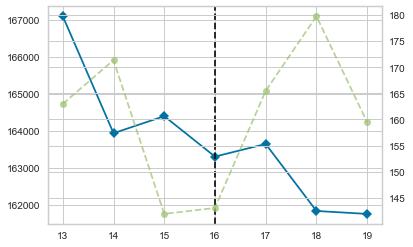

In [127]:
visualizer.fit(data_dtm)

In [16]:
no_topics = 16
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(data_dtm)

In [17]:
nmf_feature_names = cv.get_feature_names()
no_top_words = 10
display_topics(nmf, nmf_feature_names, no_top_words)

Topic 1:
par salud hospital centr virus coronavirus pacient prevencion direccion contagi
Topic 2:
personal equip municipal biosegur gad oper proteccion trabaj bomber cuerp
Topic 3:
emergent sanitari medicament nacional afront atend product durant declaratori deb
Topic 4:
medic general disposit hospital uso pacient sur guasm salud direccion
Topic 5:
adquisicion medicament implement liqu coronavirus proces product segur gel cumplimient
Topic 6:
insum medic biosegur equip limpiez desinfeccion parroqui quimic neces contagi
Topic 7:
parroqui alimentici kits vulner famili par entreg product mas afect
Topic 8:
canton provinci orellan pandemi oral sol fumigacion famili par san
Topic 9:
libr higien azuc arroz sal kits aven papel alimentici fide
Topic 10:
proteccion prend traj salud gaf segur riesg gad biolog direccion
Topic 11:
desinfeccion material ase fumigacion equip limpiez vehicul product bomb construccion
Topic 12:
aliment kits centr conveni infantil mies desarroll usuari gad parroquial
T

In [132]:
nmf.components_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01352134, ..., 0.001612  , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00086436],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07635415, 0.        ,
        0.        ]])

In [134]:
cv.get_feature_names()

['aaa',
 'aatomiz',
 'abast',
 'abastec',
 'abdon',
 'abiert',
 'abord',
 'abril',
 'absc',
 'abscis',
 'absorbent',
 'abtiflu',
 'ac',
 'acab',
 'acces',
 'accesori',
 'accesorioscanul',
 'accion',
 'accsori',
 'acdc',
 'aceit',
 'aceler',
 'acelg',
 'acer',
 'aceri',
 'aceriasnacional',
 'acesori',
 'acetaminof',
 'acetil',
 'acetilcistein',
 'aches',
 'achol',
 'acid',
 'acog',
 'acohol',
 'acomet',
 'acondicion',
 'acopi',
 'acopl',
 'acord',
 'acredit',
 'acril',
 'acta',
 'actibacterial',
 'activ',
 'activacion',
 'actual',
 'acu',
 'acuat',
 'acud',
 'acuerd',
 'acut',
 'adapt',
 'adaptacion',
 'adecu',
 'adecuacion',
 'adecuaciond',
 'adem',
 'adherent',
 'adhes',
 'adit',
 'adjudciacion',
 'adjudic',
 'adjunt',
 'administr',
 'administracion',
 'administrativoadquisicion',
 'administravanr',
 'adolescent',
 'adolscent',
 'adoquin',
 'adquapoy',
 'adquicicion',
 'adquicion',
 'adquicision',
 'adquiicion',
 'adquiiscion',
 'adquiisicion',
 'adquir',
 'adquiri',
 'adquiscicion',


In [139]:
nmf.components_.argsort()[:-no_top_words - 1:-1]

array([[   0, 2891, 2892, ..., 1479, 1449, 3840],
       [   0, 2889, 2890, ..., 1021, 3464, 1162],
       [   0, 2922, 2923, ..., 2798, 1692, 1106],
       ...,
       [   0, 2986, 2987, ...,  469, 2180, 2582],
       [   0, 2834, 2835, ...,  386, 2755, 1370],
       [   0, 2791, 2792, ..., 3153, 3529,  701]])

### doc2vec y kmeans tienen el mejor performance

https://www.researchgate.net/profile/Stephan_Curiskis/publication/332489975_An_evaluation_of_document_clustering_and_topic_modelling_in_two_online_social_networks_Twitter_and_Reddit/links/5ee76072a6fdcc73be7bc3fe/An-evaluation-of-document-clustering-and-topic-modelling-in-two-online-social-networks-Twitter-and-Reddit.pdf

In [20]:
cluster = KMeans(n_clusters=16)

In [21]:
cluster.fit(data_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
cluster.predict(data_dtm)

array([15, 13,  2, ..., 11,  2,  2], dtype=int32)

In [22]:
provedores["categoria"] = cluster.predict(data_dtm)

In [23]:
provedores[provedores["categoria"] == 4]

,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
14,CAMACHO JORDAN FULTON ANTONIO,SERVICIO NACIONAL DE GESTION DE RIESGOS Y EMER...,SNGRE-027-2020,SNGRE-027-2020-00001,ADQUISICIÓN DE KITS COMPLEMENTARIOS DE ALIMENT...,Unidad,7000.0,KIT COMPLEMENTARIO DE ALIMENTOS,150.82,1055740.00,4
24,MEGA SANTAMARIA S.A.,GOBIERNO AUTÓNOMO DESCENTRALIZADO DEL DISTRITO...,014-UPMSJ-DU-2020,014-UPMSJ-DU-2020-00001,ADQUISICIÓN DE ALIMENTOS DE PRIMERA NECESIDAD ...,Unidad,1.0,De acuerdo a convocatoria,790670.00,790670.00,4
25,TIENDAS INDUSTRIALES ASOCIADAS TIA S. A.,GOBIERNO AUTÓNOMO DESCENTRALIZADO DEL DISTRITO...,014-UPMSJ-DU-2020,014-UPMSJ-DU-2020-00003,ADQUISICIÓN DE KITS DE ALIMENTOS PARA SER DIST...,Unidad,100000.0,DE ACUERDO A ACTA DE COMISION Y RESOLUCION DE ...,7.59,759000.00,4
61,CORPORACION FAVORITA C.A.,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PROVIN...,010-GADPE-P-GAL-2020,010-GADPE-P-GAL-2020-00001,ADQUSICION DE KITS COMPLEMENTARIOS DE ALIMENTO...,Unidad,1.0,INDICADO EN LOS TDR,478380.00,478380.00,4
81,ASERTIA COMERCIAL S.A.,GOBIERNO AUTÓNOMO DESCENTRALIZADO DEL DISTRITO...,014-UPMSJ-DU-2020,014-UPMSJ-DU-2020-00005,ADQUISICIÓN DE KITS DE ALIMENTOS PARA SER DIST...,Unidad,50000.0,DE ACUERDO ACTA DE COMISION Y RESOLUCION DE AD...,7.82,391000.00,4
...,...,...,...,...,...,...,...,...,...,...,...
18047,MUY CANDO ESTHER MARLENE,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,30-2020,30-2020-00007,COMPRA DE KITS DE ALIMENTOS PARA MITIGAR EFECT...,Libra,75.0,harina de maíz por libra,0.34,25.50,4
18113,PAUCAR LAMAR CLAUDIA MARICELA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,RESOLUCION-008,RESOLUCION-008-00004,PLAN DE EMERGENCIA PARA HACER FRENTE AL COVID-...,Unidad,12.0,"PRESENTACION ROLLO 3*12""",2.01,24.13,4
18498,IMPORTADORA GLOBAL TEXANA IMPORGLOBALTEX S.A.,JUNTA PARROQUIAL GENERAL FARFAN,GADPRGF-2020-009,GADPRGF-2020-009-00005,ADQUISICIÓN DE KITS DE BIOSEGURIDAD DE ATENCIÓ...,Global,1.0,GUANTE DE EXAMINACION NITRILO NEGRO 5 MICRAS C...,17.00,17.00,4
18954,CAZCO AREVALO MARIA EVANGELINA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,RSL-013-GADPRV-2020,RSL-013-GADPRV-2020-00002,ADQUISICIÓN DE KITS DE ALIMENTOS DE AYUDA HUMA...,Unidad,1000.0,FUNDA PLASTICA DE 2LB 17.50X22.50CM,0.01,10.00,4


## Con adquisicion como stopword

In [173]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=tokenizar, strip_accents="unicode",max_df=0.8)
data_cv = cv.fit_transform(provedores["Objeto contractual"])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [164]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a20464550>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

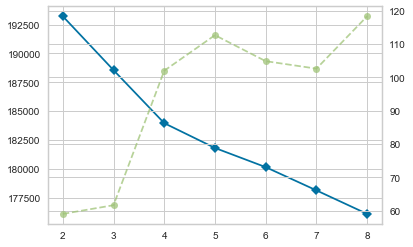

In [165]:
visualizer.fit(data_dtm)

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e07b90>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

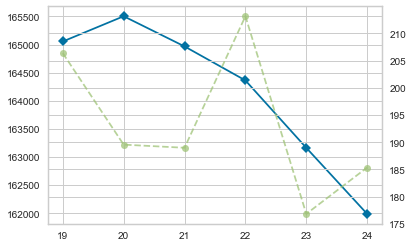

In [167]:
visualizer = KElbowVisualizer(model, k=(19,25))
visualizer.fit(data_dtm)

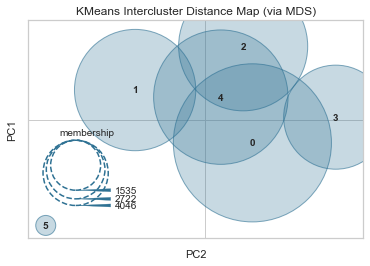

In [170]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(data_dtm)        # Fit the data to the visualizer
visualizer.show()

YellowbrickTypeError: could not find feature importances param on KMeans

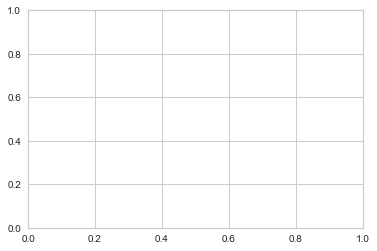

In [171]:
from yellowbrick.model_selection import feature_importances

feature_importances(KMeans(15), data_dtm)

In [174]:
fdist = nltk.FreqDist(data_dtm)
print(fdist.most_common(10))

[('aaa', 1), ('aatomiz', 1), ('abast', 1), ('abastec', 1), ('abdon', 1), ('abiert', 1), ('abord', 1), ('abril', 1), ('absc', 1), ('abscis', 1)]


In [175]:
no_topics = 15
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(data_dtm)

In [192]:
transform_data = nmf.transform(data_dtm)

In [193]:
transform_data[0]

array([0.        , 0.        , 0.        , 0.00161619, 0.        ,
       0.        , 0.        , 0.        , 0.08491769, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [183]:
nmf.components_.shape

(15, 4562)

In [194]:
clusters_nmf = KMeans(15)
clusters_nmf.fit(transform_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [200]:
clusters_nmf.predict(transform_data)

array([ 5, 11,  1, ...,  1,  1,  1], dtype=int32)

In [201]:
provedores["cluster_nmf"] = clusters_nmf.predict(transform_data)

In [207]:
provedores[provedores["cluster_nmf"] == 14].head(20)

,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,cluster_nmf
134,KAPACOMSA S.A.,HOSPITAL GENERAL GUASMO SUR,HGGS-RE-001-2020,HGGS-RE-001-2020-00012,ADQUISICIÓN DE PAÑOS ABSORBENTES PARA LIMPIEZA...,Unidad,30000.0,TOALLAS PANOS DE LIMPIEZA,7.80,234000.00,15,14
158,MANTENIMIENTO Y LIMPIEZA DE OBRAS S.A. LIOBSA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00006,SERVICIO DE DESINFECCIÓN DE ÁREAS EN LA CIUDAD...,Unidad,1.0,NaN,200000.00,200000.00,2,14
159,MANTENIMIENTO Y LIMPIEZA DE OBRAS S.A. LIOBSA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020-C6,CE-MIMG-003-2020-C6-00001,SERVICIO DE DESINFECCIÓN DE ÁREAS EN LA CIUDAD...,Unidad,1.0,NaN,200000.00,200000.00,2,14
178,GONZALEZ VIVEROS CLAUDIA PATRICIA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,026-A-GADMT-2020,026-A-GADMT-2020-00002,"SERVICIO DE DESINFECCIÓN DE ESPACIOS PÚBLICOS,...",Unidad,2.0,"SERVICIO DE DESINFECCIÓN DE ESPACIOS PÚBLICOS,...",94978.71,189957.42,2,14
186,PALACIOS PAVON FREDDY ARTURO,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,001-GADPZCH-2020,001-GADPZCH-2020-00018,ENTREGA DE INSUMOS DE DESINFECCIÓN Y MATERIAL...,Unidad,1.0,EL VALOR INCLUYE IVA,176995.01,176995.01,9,14
268,DELGADO CASTILLO DAVID ALEJANDRO,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,001-GADPZCH-2020,001-GADPZCH-2020-00017,INSUMOS DE DESINFECCIÓN Y MATERIALES DE PROTEC...,Unidad,1.0,dicho valor incluye iva segun contrato,115049.04,115049.04,9,14
375,VELA TORRES GALO FRANCISCO,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPALIDA...,DA-20-023,DA-20-023-00004,SERVICIOS DE FUMIGACIÓN Y DESINFECCIÓN EMERGEN...,Tonelada,740.0,SERVICIOS DE FUMIGACIÓN Y DESINFECCIÓN EMERGEN...,109.50,81030.00,11,14
417,SANTANA ANDRADE MARIA CRISTINA,MUNICIPIO DE PEDERNALES,052-OEAN-GADMCP-2020,052-OEAN-GADMCP-2020-00005,AQUISICION DE 10.000 KITS DE PROTECCIÓN Y DESI...,Unidad,1.0,AQUISICION DE 10.000 KITS DE PROTECCIÓN Y DESI...,73000.00,73000.00,3,14
432,ASOCIACION DE SERVICIOS DE LIMPIEZA VARIOS AMI...,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMQ-001-2020,GADMQ-001-2020-00011,PROYECTO DE EMERGENCIA SANITARIA PARA LA DESI...,Unidad,1.0,"DESINFECCION DE ACERAS, PLAZAS, PARQUES, COMUN...",70000.00,70000.00,12,14
466,GLOBAL BIOLOGICAL GLOBIOSOL S.A.,GOBIERNO AUTONOMO DESCENTRALIZADO ILUSTRE MUNI...,GADICMD-ALC-2020-073,GADICMD-ALC-2020-073-00008,CONTRATACIÓN DEL SERVICIO EMERGENTE DE DESINFE...,Unidad,1.0,Las especificadas en los TDR,65539.32,65539.32,12,14


In [208]:
pip install wordcloud

     |████████████████████████████████| 163kB 452kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [238]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, width=800, height=800)

In [63]:
import matplotlib.pyplot as plt

In [24]:
cluster_freq = data_dtm.copy()

In [25]:
cluster_freq["categoria"] = provedores["categoria"]

In [26]:
data_analysis = nltk.FreqDist(data_dtm[cluster_freq["categoria"] == 1])

In [27]:
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])

In [241]:
wc.generate_from_frequencies(filter_words)

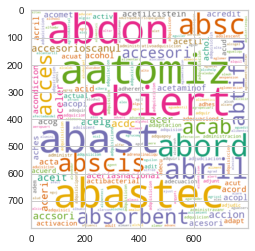

In [242]:
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [33]:
data_analysis["respirad"]

0

In [246]:
cluster_freq.to_csv("word_freq.csv")

In [29]:
provedores[provedores["categoria"] == 1]

,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.0,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.00,1
9,ROCHE ECUADOR S.A.,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00001,ADQUISICIÓN DE 100000 DETERMINACIONES PARA VIR...,Unidad,100000.0,ADQUISICIÓN DE 100000 DETERMINACIONES PARA VIR...,18.00,1800000.00,1
11,APOLO APOLO JOSE GONZALO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00030,ADQUISICIÓN DE PIPERACILINA + TAZOBACTAM SOLID...,Unidad,280800.0,PIPERACILINA + TAZOBACTAM SOLIDO PARENTERAL 40...,4.95,1389960.00,1
12,DIMPROKEL SA,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00048,ADQUISICIÓN DE PRUEBAS RÁPIDAS PARA DETECCIÓN ...,Unidad,100000.0,PRUEBAS RÁPIDAS PARA DETECCIÓN DE CORONAVIRUS ...,12.20,1220000.00,1
22,MEDILABOR S.A.,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00044,"ADQUISICION DE 75.000 PRUEBAS RAPIDAS, PARA SE...",Unidad,1.0,NaN,840000.00,840000.00,1
...,...,...,...,...,...,...,...,...,...,...,...
19597,ALMACENES BIBLIAN,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE ASEO ...,EMMAIPCG77,EMMAIPCG77-00005,ADQUISICIÓN DE CALENTADOR DE AGUA DE PASO CONT...,Unidad,5.0,TACO FISHER N10,0.04,0.22,1
19598,ALMACENES BIBLIAN,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE ASEO ...,EMMAIPCG77,EMMAIPCG77-00005,ADQUISICIÓN DE CALENTADOR DE AGUA DE PASO CONT...,Unidad,5.0,TIRAFONDO 1/4,0.04,0.22,1
19600,ALMACENES BIBLIAN,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE ASEO ...,EMMAIPCG77,EMMAIPCG77-00005,ADQUISICIÓN DE CALENTADOR DE AGUA DE PASO CONT...,Unidad,2.0,EMPAQUE 5/8 P/LLAVE,0.09,0.19,1
19601,ALMACENES BIBLIAN,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE ASEO ...,EMMAIPCG77,EMMAIPCG77-00005,ADQUISICIÓN DE CALENTADOR DE AGUA DE PASO CONT...,Unidad,5.0,ARANDELAS1/4,0.02,0.09,1


In [50]:
cluster_freq_grouped = cluster_freq.groupby(by=['categoria']).sum()

In [51]:
cluster_freq_grouped["adquisicion"]

categoria
0      452
1     3795
2        0
3      581
4      591
5      159
6      457
7      936
8     1178
9     1591
10      20
11    1691
12    1889
13      93
14     210
15    1078
Name: adquisicion, dtype: int64

In [53]:
cluster_freq_grouped_transpose = cluster_freq_grouped.transpose()

In [58]:
cluster_freq_grouped_transpose

categoria,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
aaa,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aatomiz,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abast,0,0,1,1,1,0,0,1,0,0,0,0,11,0,0,0
abastec,0,62,2,0,3,0,23,0,12,2,0,1,14,0,0,0
abdon,0,4,1,0,0,0,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zon,0,46,6,0,8,0,0,1,9,3,0,10,19,0,0,31
zonal,12,13,3,0,0,0,0,1,34,29,0,9,7,0,0,0
zumb,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,4
zumbi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0


In [61]:
cluster_freq_dict = cluster_freq_grouped_transpose.to_dict() 

In [85]:
cluster_freq_dict[1]["proteccion"]

534

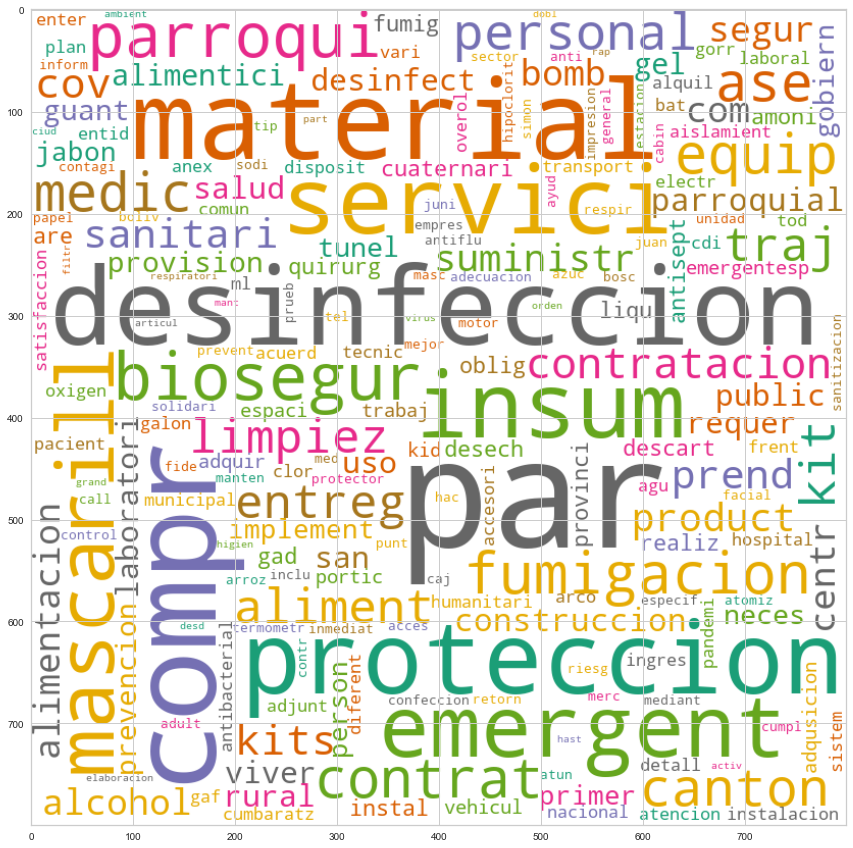

In [91]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150,width=800, height=800)

wc.generate_from_frequencies(cluster_freq_dict[2])
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [93]:
provedores[provedores["categoria"] == 2].tail(40)

,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
19520,HUILCAREMA BONIFAZ ALEX FABIAN,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,004-2020-GADPRP,004-2020-GADPRP-00007,"COMPRA DE MATERIALES PARA ARCO DE FUMIGACIÓN,",Unidad,2.00,Codo de 1/2 a 45,0.76,1.52,2
19521,TANGOY COQUINCHE DANIELA JESSIKA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,021-GADPRSR,021-GADPRSR-00004,300 RACIONES ALIMENTICIAS ARA LA EMERGENCIA PO...,Miligramo,1.00,LECHE VAQUITA EN POLVO DE 500MG,1.50,1.50,2
19530,JERVES FONTANA CARLOS ANDRES,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,028-A-GADMCH-2020,028-A-GADMCH-2020-00002,"ALCOHOL, GUANTES, RODAPIES",Unidad,1.00,ATOMIZADOR,1.41,1.41,2
19533,TANGOY COQUINCHE DANIELA JESSIKA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,021-GADPRSR,021-GADPRSR-00004,300 RACIONES ALIMENTICIAS ARA LA EMERGENCIA PO...,Libra,1.00,LIBRA DE LENTEJA,1.35,1.35,2
19538,TANGOY COQUINCHE DANIELA JESSIKA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,021-GADPRSR,021-GADPRSR-00004,300 RACIONES ALIMENTICIAS ARA LA EMERGENCIA PO...,Miligramo,1.00,FUNDA DE TAPIOKITA DE 500MG,1.25,1.25,2
19539,TANGOY COQUINCHE DANIELA JESSIKA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,021-GADPRSR,021-GADPRSR-00004,300 RACIONES ALIMENTICIAS ARA LA EMERGENCIA PO...,Libra,1.00,FRIJOL BOLON,1.25,1.25,2
19544,TANGOY COQUINCHE DANIELA JESSIKA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,021-GADPRSR,021-GADPRSR-00004,300 RACIONES ALIMENTICIAS ARA LA EMERGENCIA PO...,Kilogramo,1.00,AZUCAR MORENA,1.20,1.20,2
19548,ENCARNACION BRAVO SEGUNDO MIGUEL,CUERPO DE BOMBEROS DEL CANTON EL PANGUI,CBCEP-001-2020,CBCEP-001-2020-00004,MATERIALES ELECTRICOS Y DE PLOMERIA,Unidad,1.00,DE 1/2,1.12,1.12,2
19549,ENCARNACION BRAVO SEGUNDO MIGUEL,CUERPO DE BOMBEROS DEL CANTON EL PANGUI,CBCEP-001-2020,CBCEP-001-2020-00004,MATERIALES ELECTRICOS Y DE PLOMERIA,Unidad,1.00,BIMETAL,1.11,1.11,2
19552,GAONA SEVERINO ROCIO CRISTINA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,044-2020-A-GADMP,044-2020-A-GADMP-00011,KITS DE ASEO,Unidad,1.00,FUNDA NEGRA CAMISETA P7,1.03,1.03,2


## Grupos 

* **Grupo 0:** Compra de protección de personal (mascarillas, guantes, batas, etc)
* **Grupo 1:** Compra de pruebas y tratamientos (medicina) (incluye tambien materiales de obras, mascarillas, alcohol, trajes, desinfectantes)


In [94]:
from sklearn.decomposition import PCA

In [148]:
pca = PCA(n_components='mle', svd_solver ='full')
pca.fit(data_dtm)

KeyboardInterrupt: 

In [ ]:
data_pca = pca.transform(data_dtm)

In [ ]:
data_pca.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 40))
visualizer.fit(data_pca)

In [124]:
model = KMeans(22)

In [125]:
model.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=22, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
data_cluster_pca = provedores.copy()
data_cluster_pca["categoria"] = model.predict(data_pca)

In [147]:
data_cluster_pca[data_cluster_pca["categoria"] == 6].tail(80)

,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
18065,ABAD ABAD CARLOS FAUSTO,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,003-GADPRSA-2020,003-GADPRSA-2020-00003,ADQUISICIÓN DE SEMILLAS DE LEGUMBRES DE CICLO ...,Unidad,100.0,NaN,0.25,25.00,6
18085,ANGAMARCA CARRION LIZETTE DEL CISNE,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL D...,GADPY-005-2020,GADPY-005-2020-00002,ADQUISICIÓN DE INSUMOS DE BIOSEGURIDAD Y DE FU...,Unidad,1.0,REPUESTO PARA MOTO FUNIGADORA,25.00,25.00,6
18100,ORDOÑEZ PIEDRA ANGEL BOLIVAR,GOBIERNO AUTÓNOMO DESCENTRALIZADO MUNICIPAL DE...,101-AL-GADMG-2020,101-AL-GADMG-2020-00008,ADQUISICIÓN DE KITS DE ALIMENTACIÓN CON EL PRE...,Global,1.0,CUMPLE ESPECIFICACIÓN TÉCNICA,24.79,24.79,6
18110,CALLE BARROS MARLENE ELIZABETH,EMPRESA PÚBLICA DE ÁRIDOS Y ASFALTOS DEL AZUAY,ASFALTAR001-2020,ASFALTAR001-2020-00004,ADQUISICIÓN DE EQUIPOS E IMPLEMENTO DE SEGURID...,Unidad,5.0,DESINFECTANTE BLEN POR GALON,4.86,24.30,6
18136,CALLE BARROS MARLENE ELIZABETH,EMPRESA PÚBLICA DE ÁRIDOS Y ASFALTOS DEL AZUAY,ASFALTAR001-2020,ASFALTAR001-2020-00004,ADQUISICIÓN DE EQUIPOS E IMPLEMENTO DE SEGURID...,Unidad,100.0,MASCARILLAS QUIRÚRGICAS,0.24,24.00,6
...,...,...,...,...,...,...,...,...,...,...,...
19407,VERA CABRERA JORGE ENRIQUE,GOBIERNO PARROQUIAL RURAL DE SAN CARLOS DE LAS...,003-GADPSCM-2020,003-GADPSCM-2020-00005,ADQUISICION DE EQUIPO DE DESINFECCION E INSUMO...,Unidad,1.0,Litro de aceite CASTROL 2 tiempos,3.30,3.30,6
19494,ABAD ABAD CARLOS FAUSTO,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,003-GADPRSA-2020,003-GADPRSA-2020-00003,ADQUISICIÓN DE SEMILLAS DE LEGUMBRES DE CICLO ...,Unidad,100.0,NaN,0.02,2.00,6
19500,CULCAY PERALTA JUAN CARLOS,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,PR-GADPRLL-008-2020,PR-GADPRLL-008-2020-00002,ADQUISICION DE INSUMOS DE BIOSEGURIDAD,Unidad,1.0,GAFA TRANSPARENTE PARA PROTECCION,2.00,2.00,6
19502,CARAPAZ BOLAÑOS FREDY GUSTAVO,JUNTA PARROQUIAL DE MONTE OLIVO,030-GADPRMO-2020,030-GADPRMO-2020-00014,ADQUISICIÓN DE MANGUERA Y OTROS,Unidad,1.0,Acople piton bronce de media pulgada,1.92,1.92,6


In [135]:
def obtenerFrecuenciaPalabras(matrizFreq, clusters_indexados):
    matrizFreq["categoria"] = clusters_indexados
    cluster_freq_grouped = matrizFreq.groupby(by=['categoria']).sum()
    cluster_freq_grouped_transpose = cluster_freq_grouped.transpose()
    return cluster_freq_grouped_transpose.to_dict() 

In [138]:
freq_dict_cluster_pca = obtenerFrecuenciaPalabras(data_dtm, data_cluster_pca["categoria"])

In [139]:
freq_dict_cluster_pca

{0: {'aaa': 0,
  'aatomiz': 0,
  'abast': 1,
  'abastec': 1,
  'abdon': 1,
  'abiert': 0,
  'abord': 0,
  'abril': 16,
  'absc': 1,
  'abscis': 0,
  'absorbent': 1,
  'abtiflu': 0,
  'ac': 1,
  'acab': 0,
  'acces': 8,
  'accesori': 37,
  'accesorioscanul': 2,
  'accion': 8,
  'accsori': 0,
  'acdc': 0,
  'aceit': 17,
  'aceler': 0,
  'acelg': 0,
  'acer': 15,
  'aceri': 0,
  'aceriasnacional': 0,
  'acesori': 0,
  'acetaminof': 0,
  'acetil': 0,
  'acetilcistein': 0,
  'aches': 0,
  'achol': 2,
  'acid': 3,
  'acog': 3,
  'acohol': 1,
  'acomet': 1,
  'acondicion': 1,
  'acopi': 0,
  'acopl': 0,
  'acord': 1,
  'acredit': 2,
  'acril': 3,
  'acta': 8,
  'actibacterial': 0,
  'activ': 10,
  'activacion': 0,
  'actual': 0,
  'acu': 0,
  'acuat': 1,
  'acud': 1,
  'acuerd': 7,
  'acut': 0,
  'adapt': 0,
  'adaptacion': 0,
  'adecu': 5,
  'adecuacion': 26,
  'adecuaciond': 0,
  'adem': 0,
  'adherent': 0,
  'adhes': 1,
  'adit': 0,
  'adjudciacion': 1,
  'adjudic': 0,
  'adjunt': 6,
  'ad

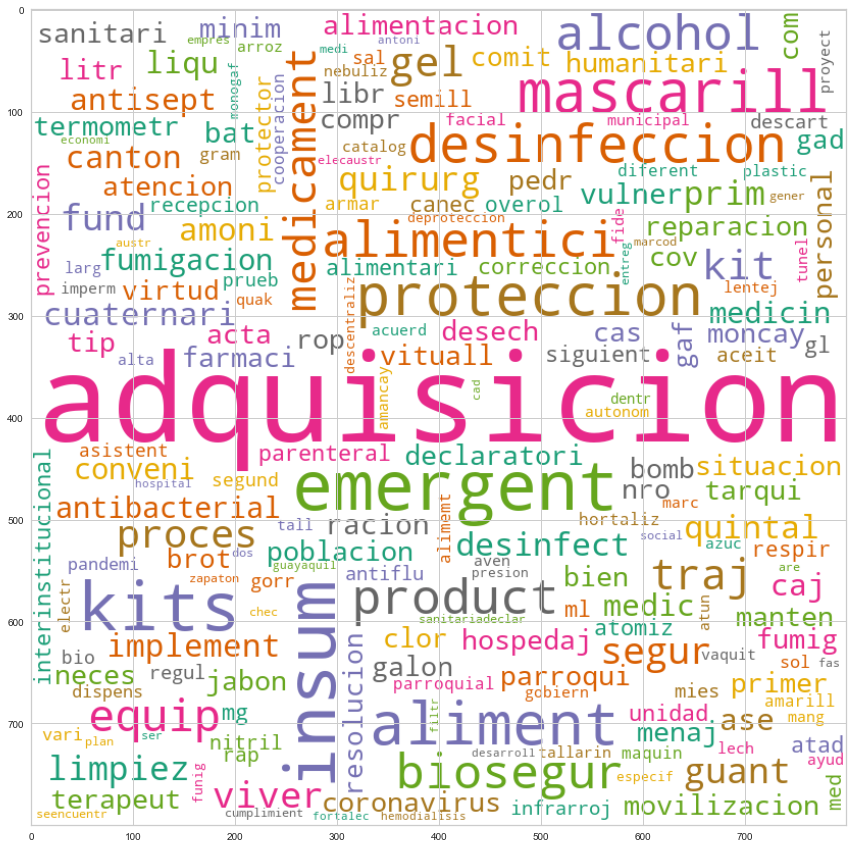

In [146]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150,width=800, height=800)

wc.generate_from_frequencies(freq_dict_cluster_pca[6])
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.show()